# 연령별 분만건수 분석


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('시군구별 연령별 분만 통계 2018~2022.csv', encoding='cp949')#데이터불러오기

In [27]:
df.head()

,년도,시도,시군구,연령구분,분만건수
0,2018,서울,강남구,19세 이하,0
1,2018,서울,강남구,20~29세,1124
2,2018,서울,강남구,30~39세,8000
3,2018,서울,강남구,40~49세,628
4,2018,서울,강남구,50세 이상,0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

data = pd.DataFrame(df)

In [29]:
le = LabelEncoder()
data['연령구분_수치'] = le.fit_transform(data['연령구분']) #연령구분 수치로 변경

In [30]:
data.head()#확인

,년도,시도,시군구,연령구분,분만건수,연령구분_수치
0,2018,서울,강남구,19세 이하,0,0
1,2018,서울,강남구,20~29세,1124,1
2,2018,서울,강남구,30~39세,8000,2
3,2018,서울,강남구,40~49세,628,3
4,2018,서울,강남구,50세 이상,0,4


In [31]:
data.head()#상위 5열 확인 0 1 2 3 4로 되어있는 것을 볼 수 있음

,년도,시도,시군구,연령구분,분만건수,연령구분_수치
0,2018,서울,강남구,19세 이하,0,0
1,2018,서울,강남구,20~29세,1124,1
2,2018,서울,강남구,30~39세,8000,2
3,2018,서울,강남구,40~49세,628,3
4,2018,서울,강남구,50세 이상,0,4


In [32]:
x=data[['연령구분_수치']]
y=data['분만건수']

model = LinearRegression()
model.fit(x, y)

r_squared = model.score(x, y)
print(f'R-squared: {r_squared}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

data['예측값'] = model.predict(x)
data.head()

R-squared: 0.0018409490295087094
Coefficients: [-19.4204]
Intercept: 261.07856


,년도,시도,시군구,연령구분,분만건수,연령구분_수치,예측값
0,2018,서울,강남구,19세 이하,0,0,261.07856
1,2018,서울,강남구,20~29세,1124,1,241.65816
2,2018,서울,강남구,30~39세,8000,2,222.23776
3,2018,서울,강남구,40~49세,628,3,202.81736
4,2018,서울,강남구,50세 이상,0,4,183.39696


<BarContainer object of 6250 artists>

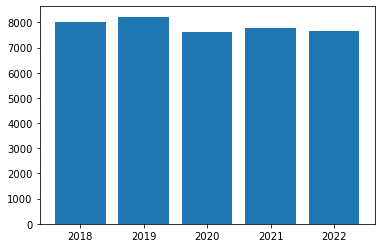

In [35]:
plt.bar(data['년도'], data['분만건수'])#건수에 대한 년도별 막대그래프

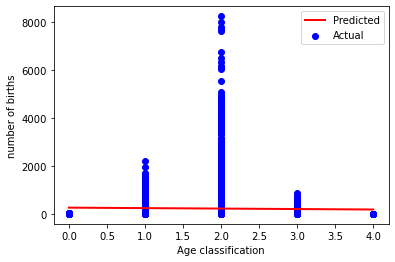

In [33]:
plt.scatter(data['연령구분_수치'], data['분만건수'], color='blue', label='Actual')#산점도
plt.plot(data['연령구분_수치'], data['예측값'], color='red', linewidth=2, label='Predicted')#회귀식 표시
plt.xlabel('Age classification')
plt.ylabel('number of births')
plt.legend()
plt.show()

In [34]:
coefficients = model.coef_
intercept = model.intercept_
print(f'회귀식: 분만건수 = {coefficients[0]} * 연령구분_수치 + {intercept}')

회귀식: 분만건수 = -19.420399999999997 * 연령구분_수치 + 261.07856
